<a href="https://colab.research.google.com/github/dev-researcher/automatas/blob/main/EML_2024_2_Trabajo_Corto_2_Arjun_Elena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Maestría Académica en Ciencias de la Computación**

**Curso: Electiva Aprendizaje Automático**

**Segundo Semestre 2024**

**Profesor: Dr. Luis-Alexander Calvo-Valverde**

---

**Trabajo Práctico:** 2

**Datos de la entrega:** Miércoles 9 de octubre 2024, a más tardar a las 6:00 pm

**Medio de entrega**: Por medio del TEC-Digital.

**Entregables**: Un archivo jupyter ( .IPYNB ) y todos los archivos adiconales que se requieran para correr su Cuaderno (En un archivo comprimido)

---

**Estudiantes:**
- Arjun Sing
- Elena Portuguez





# Nota Introductoria.

Usted puede cambiar los datasets que se le proporcionan por otros de su interés; pero de hacerlo, se le recomienda valorarlo con el profesor para que sus datasets no le agreguen una complicación importante al Trabajo Práctico.

___

# Parte 1  -  Regresión (50 puntos)
___

# Introducción

Considere:
- Se le proporciona un conjunto de datos (diamonds), si desea conocer un poco de los atributos puede consultar en: https://www.kaggle.com/datasets/shivam2503/diamonds
- Note que en la página proporcionada se mencionan más atributos de los que contiene el archivo facilitado.  
- El objetivo de esta parte es ver como el estudiante se enfrenta al proceso de pre-procesamiento, selección de atributos, predicción y evaluación.  Por eso es muy importante que documente en este cuaderno sus decisiones, eso se tomará muy en cuenta en la evaluación de su respuesta.
- El atributo a predecir en regresión se denomina: price.
- Debe comentar ampliamente su código


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving diamonds.csv to diamonds.csv


### 1 (5 puntos)
- Cargue el archivo.
- Utilice las herramientas (gráficos, funciones que describen contenido o características de las variables, etc) que considere necesarias para analizar los atributos que tiene el dataset y ver si tiene valores faltantes, valores atípicos, etc.
- Comente sus conclusiones sobre los atritubos.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
 7   cut     53940 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 3.3 MB
None

Summary statistics:
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    

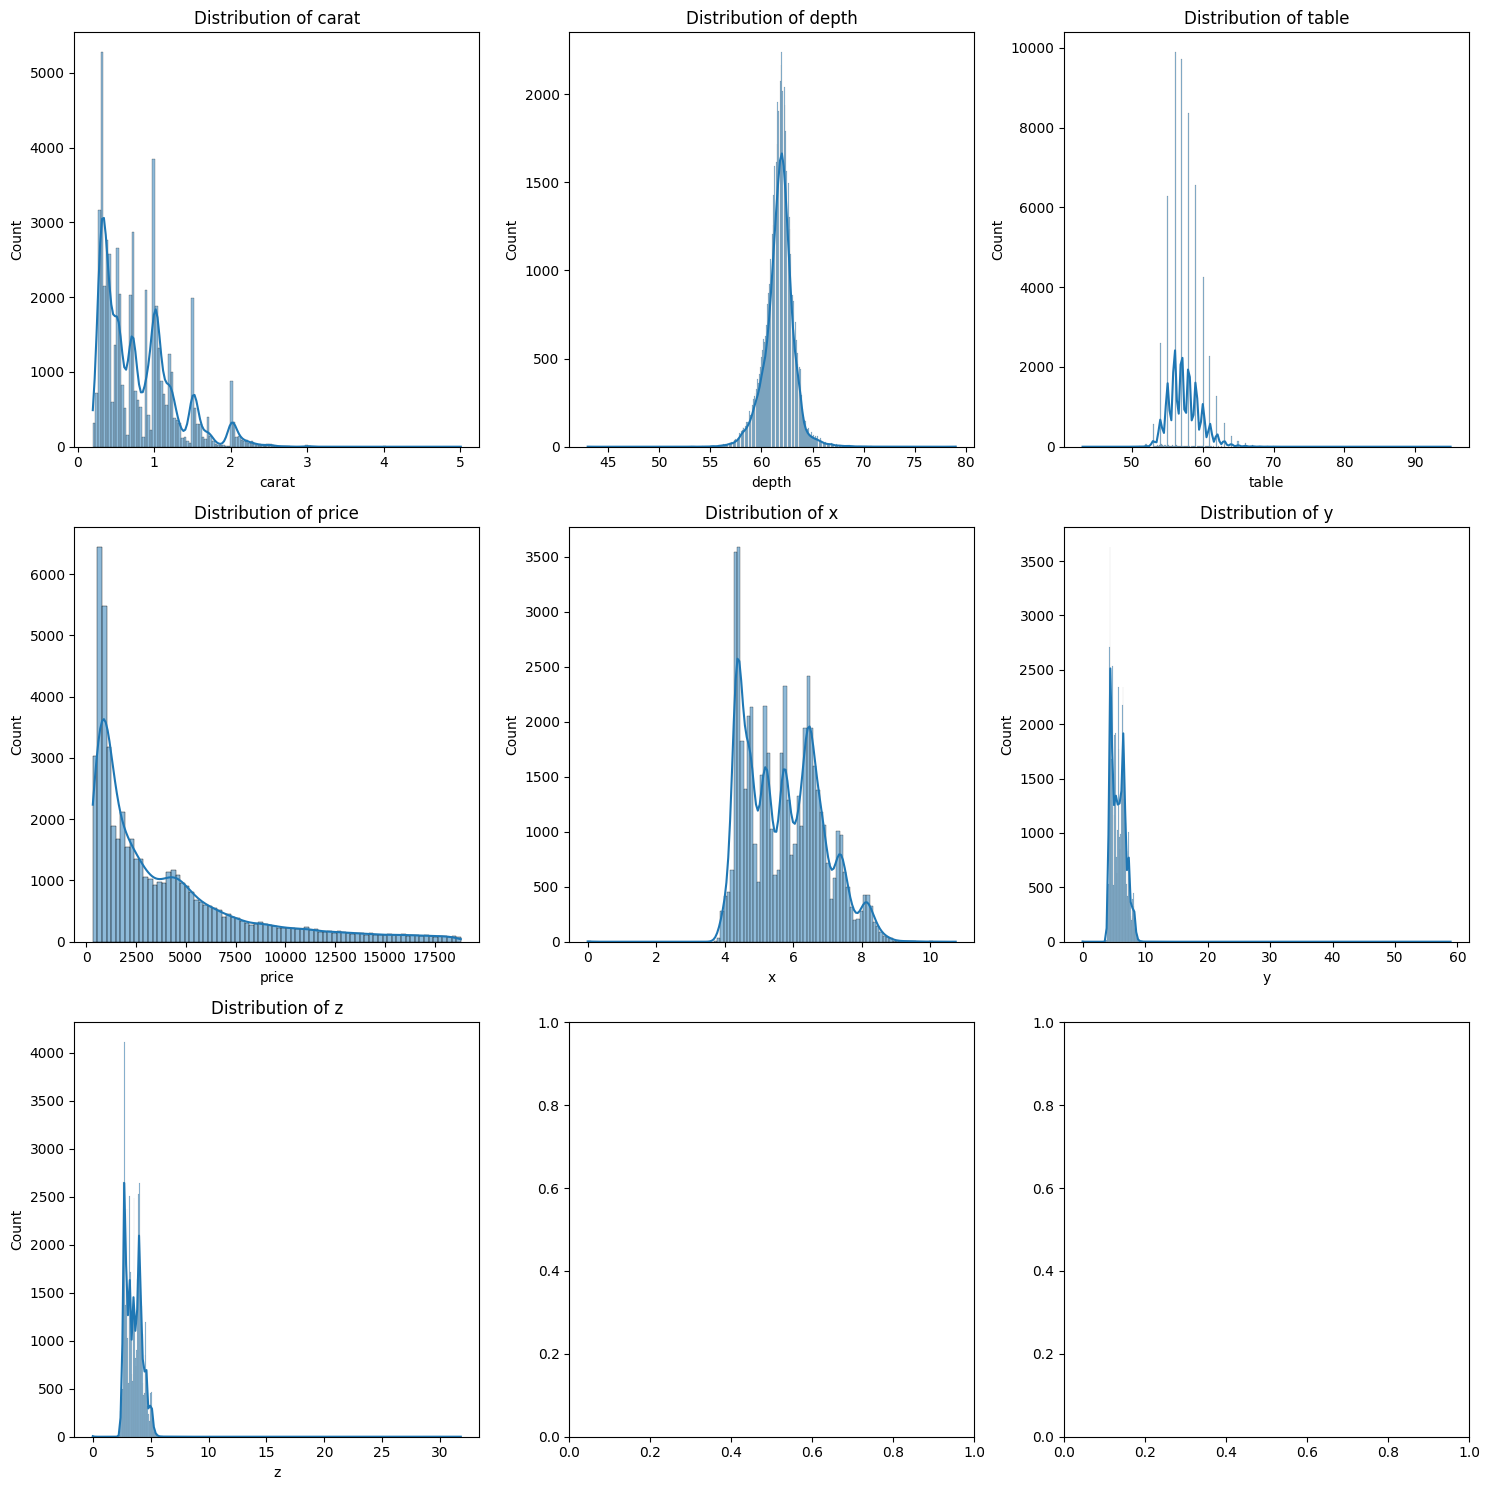

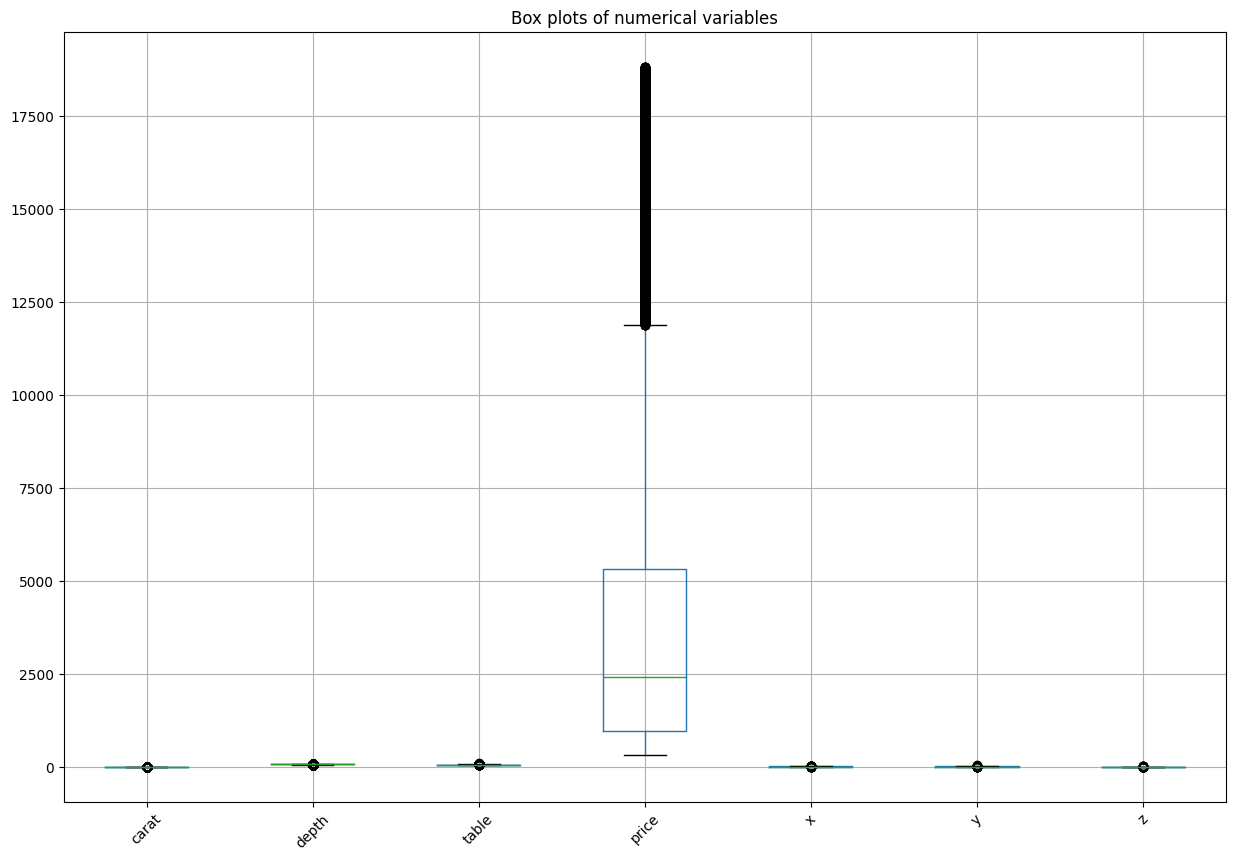

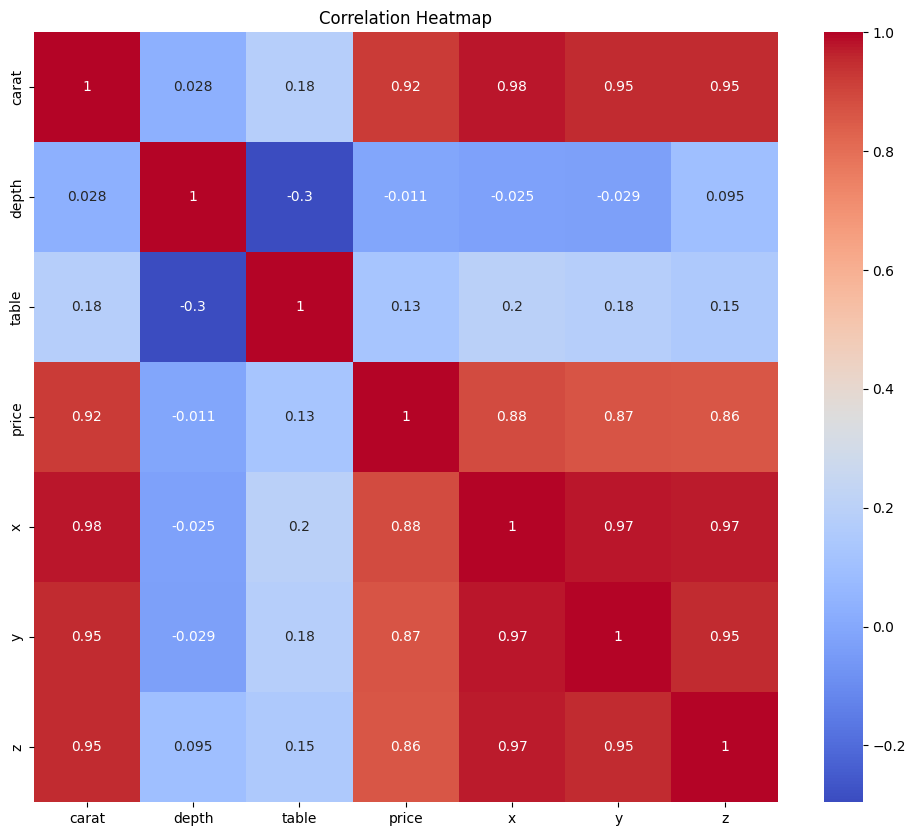

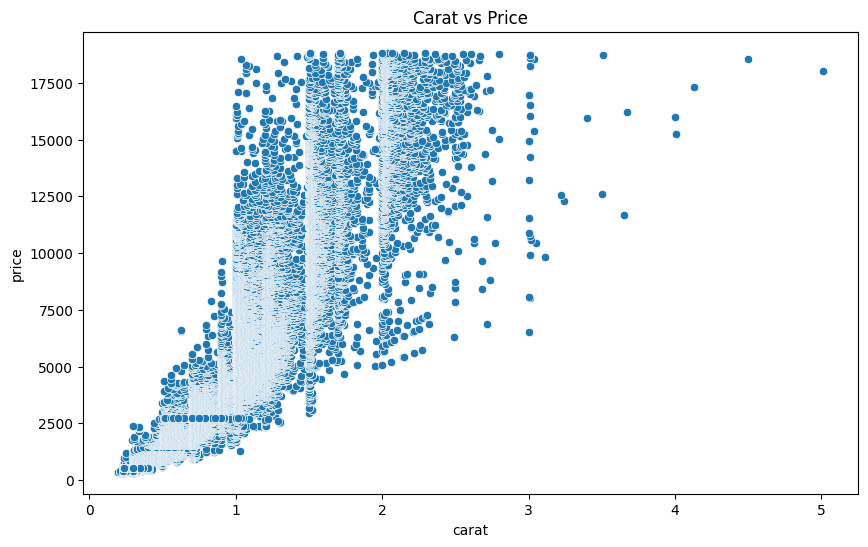


Distribution of 'cut':
cut
4    21551
3    13791
2    12082
1     4906
0     1610
Name: count, dtype: int64


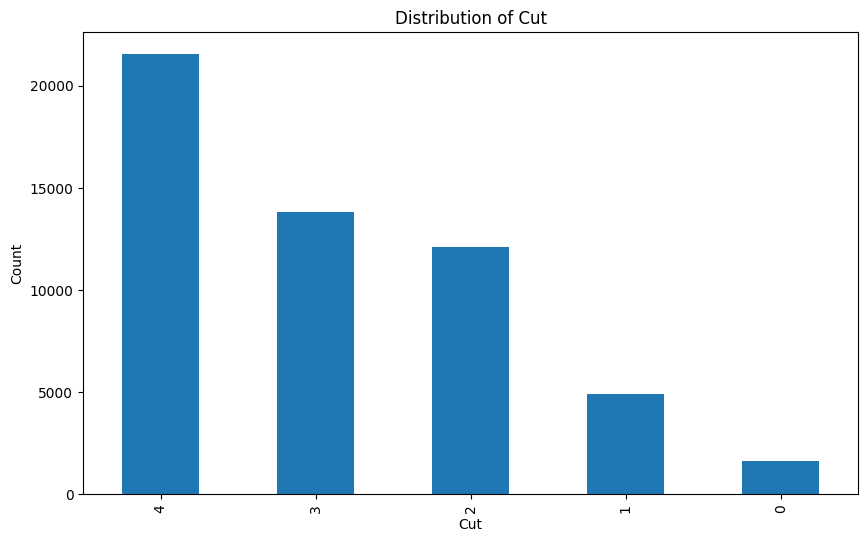


Outliers in carat: 1889
       carat  price
12246   2.06   5203
13002   2.14   5405
13118   2.15   5430
13757   2.22   5607
13991   2.01   5696

Outliers in depth: 2545
    depth  price
2    56.9    327
8    65.1    337
24   58.1    353
35   58.2    402
42   65.2    403

Outliers in table: 605
     table  price
2     65.0    327
91    69.0   2757
145   64.0   2767
219   64.0   2782
227   67.0   2782

Outliers in price: 3540
       price  price
23820  11886  11886
23821  11886  11886
23822  11888  11888
23823  11888  11888
23824  11888  11888

Outliers in x: 32
          x  price
11182  0.00   4954
11963  0.00   5139
15951  0.00   6381
22741  9.54  10761
22831  9.38  10863

Outliers in y: 29
          y  price
11963  0.00   5139
15951  0.00   6381
22741  9.38  10761
22831  9.31  10863
23644  9.48  11668

Outliers in z: 49
         z  price
2207   0.0   3142
2314   0.0   3167
4791   0.0   3696
5471   0.0   3837
10167  0.0   4731


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df =  pd.read_csv(io.BytesIO(uploaded['diamonds.csv']))

# Basic information about the dataset
print(df.info())
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Function to plot histograms
def plot_histograms(df, columns, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

# Plot histograms for numerical columns
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
plot_histograms(df, numerical_columns, 3, 3)

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
df[numerical_columns].boxplot()
plt.title('Box plots of numerical variables')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of carat vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Carat vs Price')
plt.show()

# Check the distribution of categorical variable 'cut'
print("\nDistribution of 'cut':")
print(df['cut'].value_counts())

# Bar plot for 'cut'
plt.figure(figsize=(10, 6))
df['cut'].value_counts().plot(kind='bar')
plt.title('Distribution of Cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check outliers for numerical columns
for col in numerical_columns:
    outliers = detect_outliers(df, col)
    print(f"\nOutliers in {col}: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[[col, 'price']].head())

Missing Values: El conjunto de datos no tiene ningún valor faltante

# Data Types and Basic Statistics:
- Tenemos 7 columnas numéricas (carat, depth, table, price, x, y, z) y 1 columna categórica (cut).
- La ​​columna "cut" está codificada como números enteros (0-4), que pueden representar diferentes niveles de calidad.
- El rango de precios va de 326 a 18823, con una media de 3932.799722.
- El rango de quilates va de 0,2 a 5,01, con una media de 0,797940.

# Distribuciones:
- Quilates: distribución sesgada a la derecha, la mayoría de los diamantes son más pequeños
- Precio: distribución sesgada a la derecha, con la mayoría de los diamantes en el rango de precio más bajo.
- Profundidad: distribución aproximadamente normal, centrada alrededor del 61-62 %.
- Tabla: ligeramente sesgada a la derecha, la mayoría de los valores entre el 55-60 %.
- x, y, z (dimensiones): sesgado a la derecha, siguiendo un patrón similar al de los quilates.

# Outliers:
- Usando el método IQR, detectamos algunos valores atípicos en cada columna numérica.
- Los valores atípicos más notables están en las columnas "quilates" y "precio", lo cual es común en el mercado de diamantes, ya que los diamantes grandes cuestan más.




### 2 (5 puntos)
- Se utilizará el modelo Train/Validation (70%)  y Test (30%).
- Comente su decisión sobre los parámetros shuffle y random_state
- Separe  los  conjuntos de datos (70-30) (X_trainVal, X_test, y_trainVal, y_test )
- Muestre los primeros 5 registros de cada conjunto.


In [ ]:
import pandas as pd
import numpy as np
import io
from sklearn.model_selection import train_test_split

# Load the data
df =  pd.read_csv(io.BytesIO(uploaded['diamonds.csv']))

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Split the data into train/validation (70%) and test (30%) sets
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Display the first 5 records from each set
print("First 5 records of X_trainVal:")
print(X_trainVal.head())

print("\nFirst 5 records of X_test:")
print(X_test.head())

print("\nFirst 5 records of y_trainVal:")
print(y_trainVal.head())

print("\nFirst 5 records of y_test:")
print(y_test.head())

# Print the shapes of the resulting sets
print("\nShapes of the datasets:")
print(f"X_trainVal: {X_trainVal.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_trainVal: {y_trainVal.shape}")
print(f"y_test: {y_test.shape}")

First 5 records of X_trainVal:
       carat  depth  table     x     y     z  cut
32357   0.30   63.1   56.0  4.25  4.28  2.69    1
36705   0.46   62.3   59.0  4.95  4.91  3.07    4
35379   0.41   61.9   58.0  4.75  4.78  2.95    3
23169   1.23   61.2   56.0  6.94  6.90  4.23    4
45644   0.25   62.1   56.0  4.02  4.05  2.50    4

First 5 records of X_test:
       carat  depth  table     x     y     z  cut
44751   0.51   61.4   58.0  5.13  5.09  3.14    3
22963   2.01   62.9   54.0  8.06  7.93  5.05    4
9078    1.08   62.1   59.0  6.57  6.53  4.07    4
26148   2.13   61.5   57.0  8.27  8.34  5.11    2
29451   0.33   61.9   56.0  4.46  4.49  2.77    4

First 5 records of y_trainVal:
32357      789
36705      952
35379      899
23169    11182
45644      525
Name: price, dtype: int64

First 5 records of y_test:
44751     1619
22963    11011
9078      4521
26148    15454
29451      702
Name: price, dtype: int64

Shapes of the datasets:
X_trainVal: (37758, 7)
X_test: (16182, 7)
y_trainVal: 

# Shuffle parameter
Configuramos shuffle=True en la función train_test_split porque:-
- Garantiza que los datos se distribuyan aleatoriamente entre los conjuntos de entrenamiento/validación y de prueba. Esto ayuda a evitar cualquier sesgo potencial que pueda existir debido al orden original de los datos.
- La mezcla ayuda a mantener las propiedades estadísticas del conjunto de datos tanto en el conjunto de entrenamiento como en el de prueba. Esto es particularmente importante si hay algún orden o patrón inherente en el conjunto de datos original (por ejemplo, si los diamantes se ordenaron por precio o quilates).
- Reduce el riesgo de sobreajuste a cualquier subconjunto particular de los datos, ya que el modelo se entrenará y probará en una muestra aleatoria de todo el conjunto de datos.

# Random_state parameter:
Configuramos random_state=42. El valor específico (42) no importa siempre que sea coherente. Es una práctica común utilizar 42, ya que es la "Answer to the Ultimate Question of Life, the Universe, and Everything" en "The Hitchhiker's Guide to the Galaxy".

- Al configurar un random_state fijo, nos aseguramos de que cada vez que ejecutemos este código, obtengamos la misma división de datos. Esto es esencial para reproducir resultados y depurar.
-  Durante el desarrollo y ajuste del modelo, mantener la misma división nos ayuda a hacer comparaciones justas entre diferentes modelos o hiperparámetros.

### 3  (10 puntos)
- Preprocese los atributos (Solo deje para más adelante escalar los datos).
- Debe comentar en celdas del texto el por qué seleccionó las técnicas utilizadas.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Load the data
df =  pd.read_csv(io.BytesIO(uploaded['diamonds.csv']))


# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Split the data into train/validation (70%) and test (30%) sets
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Define preprocessing steps
def preprocess_data(X):
    # 1. Handle categorical variable 'cut'
    # We'll use one-hot encoding for 'cut' as it's categorical
    categorical_features = ['cut']
    numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

    categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )

    # 2. Create new features
    def add_features(X):
        X = pd.DataFrame(X, columns=numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out()))
        # Volume feature
        X['volume'] = X['x'] * X['y'] * X['z']
        # Depth percentage feature
        X['depth_percentage'] = X['z'] / ((X['x'] + X['y']) / 2) * 100
        # Carat to volume ratio
        X['carat_density'] = X['carat'] / X['volume']
        return X

    # 3. Log transform for 'carat' (since it's right-skewed)
    def log_transform(X):
        X['log_carat'] = np.log1p(X['carat'])
        return X

    # Combine all preprocessing steps
    preprocessor_pipeline = Pipeline([
        ('column_transformer', preprocessor),
        ('add_features', FunctionTransformer(add_features)),
        ('log_transform', FunctionTransformer(log_transform))
    ])

    return preprocessor_pipeline.fit_transform(X)

# Apply preprocessing
X_trainVal_processed = preprocess_data(X_trainVal)
X_test_processed = preprocess_data(X_test)

# Display the first 5 rows of processed data
print("First 5 rows of processed training data:")
print(pd.DataFrame(X_trainVal_processed).head())

# Display shape of processed data
print("\nShape of processed data:")
print(f"X_trainVal_processed: {X_trainVal_processed.shape}")
print(f"X_test_processed: {X_test_processed.shape}")

First 5 rows of processed training data:
   carat  depth  table    x     y     z  cut_1  cut_2  cut_3  cut_4  volume  \
0    0.0    0.0    0.0  1.0  1.21  61.3   57.0   6.92   6.87   4.23  74.173   
1    0.0    0.0    0.0  1.0  0.31  62.0   56.0   4.38   4.36   2.71  19.220   
2    0.0    0.0    0.0  1.0  1.21  62.4   57.0   6.75   6.83   4.24  75.504   
3    0.0    0.0    0.0  1.0  0.81  62.6   55.0   5.92   5.96   3.72  50.706   
4    0.0    0.0    0.0  1.0  0.79  61.7   56.0   5.94   5.95   3.67  48.743   

   depth_percentage  carat_density  log_carat  
0       5547.511312            0.0        0.0  
1       9465.648855            0.0        0.0  
2       5647.058824            0.0        0.0  
3       6917.127072            0.0        0.0  
4       6893.854749            0.0        0.0  

Shape of processed data:
X_trainVal_processed: (37758, 14)
X_test_processed: (16182, 14)


# Manejo de la variable categórica 'cut':

Utilicé la codificación One-Hot para la variable 'cut'.

- Fundamento: 'cut' es una variable categórica sin orden inherente. La codificación One-Hot permite que el modelo trate cada categoría de forma independiente, lo que resulta adecuado cuando no existe una relación ordinal entre categorías.
-Utilizamos drop='first' para evitar la trampa de la variable ficticia, que puede causar problemas de multicolinealidad en algunos modelos.

Creación de nuevas funciones:

a)  Volumen: Calculado como x * y * z.

Fundamento: El volumen proporciona una medida única del tamaño del diamante, que podría ser un fuerte predictor del precio.

b) Porcentaje de profundidad:

Calculado como (z / ((x + y) / 2)) * 100.

Fundamento: Esto proporciona una medida de qué tan profundo es el diamante en relación con su ancho, lo que puede afectar su apariencia y valor.

c) Densidad en quilates:

Calculada como quilates / volumen.

Fundamento: Esta función captura qué tan compacto es el diamante, lo que podría ser un indicador de calidad y valor.

Transformación logarítmica de 'quilate':

Apliqué una transformación logarítmica (específicamente, log1p que es log(1+x)) a la función 'quilate'.

Fundamento: En nuestro análisis anterior, observamos que 'quilate' tenía una distribución sesgada hacia la derecha. La transformación logarítmica puede ayudar a normalizar esta distribución, lo que puede resultar beneficioso para muchos algoritmos de aprendizaje automático.

### 4 (5 puntos)
- Realice selección de atributos.
- Debe utilizar al menos una técnica para justificar su decisión (De entre los métodos: Filter, Wrapper, Embedded).
- Comente sus conclusiones.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Load and preprocess the data
#file_path = r"E:\\HomeworkTEC\\diamonds.csv"
#df = pd.read_csv(file_path)
df =  pd.read_csv(io.BytesIO(uploaded['diamonds.csv']))
X = df.drop('price', axis=1)
y = df['price']

X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline
categorical_features = ['cut']
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Custom feature engineering function
def add_features(X):
    # Convert to DataFrame for consistent column names
    X = pd.DataFrame(X, columns=numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))

    # Avoid log of zero or negative by adding a small positive value (if necessary)
    X['volume'] = (X['x'] * X['y'] * X['z']).replace(0, np.nan)
    X['depth_percentage'] = X['z'] / ((X['x'] + X['y']) / 2) * 100
    X['carat_density'] = X['carat'] / X['volume']

    # Log transformation for 'carat' - handle zero values if they exist
    X['log_carat'] = np.log1p(X['carat'].replace(0, np.nan))

    return X

# Combine preprocessing steps
preprocessor_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('add_features', FunctionTransformer(add_features, validate=False)),
    ('imputer', SimpleImputer(strategy="mean"))  # Fill missing values
])

# Fit preprocessor and transform data
X_trainVal_processed = preprocessor_pipeline.fit_transform(X_trainVal)
X_test_processed = preprocessor_pipeline.transform(X_test)

# Get feature names after preprocessing
numeric_feature_names = numeric_features + ['volume', 'depth_percentage', 'carat_density', 'log_carat']
categorical_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(['cut']))
feature_names = numeric_feature_names + categorical_feature_names

# 1. Filter Method: Mutual Information
mi_selector = SelectKBest(mutual_info_regression, k='all')
mi_selector.fit(X_trainVal_processed, y_trainVal)

mi_scores = pd.DataFrame({'feature': feature_names, 'mi_score': mi_selector.scores_})
mi_scores = mi_scores.sort_values('mi_score', ascending=False)

print("Mutual Information Scores:")
print(mi_scores)

# 2. Embedded Method: Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_trainVal_processed, y_trainVal)

rf_importances = pd.DataFrame({'feature': feature_names, 'importance': rf.feature_importances_})
rf_importances = rf_importances.sort_values('importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(rf_importances)

# 3. Permutation Importance
perm_importance = permutation_importance(rf, X_test_processed, y_test, n_repeats=10, random_state=42)

perm_importances = pd.DataFrame({'feature': feature_names, 'importance': perm_importance.importances_mean})
perm_importances = perm_importances.sort_values('importance', ascending=False)

print("\nPermutation Importances:")
print(perm_importances)

# Select top 10 features based on Random Forest importance
top_features = rf_importances.nlargest(10, 'importance')['feature'].tolist()

print("\nTop 10 selected features:")
print(top_features)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Mutual Information Scores:
             feature  mi_score
0              carat  1.895244
13             cut_4  1.738036
4                  y  1.450354
3                  x  1.443897
10             cut_1  1.439036
5                  z  1.408035
12             cut_3  0.892711
11             cut_2  0.315746
9          log_carat  0.048393
2              table  0.046169
8      carat_density  0.040285
1              depth  0.035635
7   depth_percentage  0.032081
6             volume  0.010930

Random Forest Feature Importances:
             feature  importance
10             cut_1    0.611224
4                  y    0.116679
0              carat    0.098478
12             cut_3    0.079346
13             cut_4    0.030908
11             cut_2    0.018327
3                  x    0.013096
2              table    0.010062
5                  z    0.008488
1              depth    0.007672
9          log_carat    0.003326
7   depth_percentage    0.001067
8      carat_density    0.000792
6         

# Método de filtro: información mutua

- Este método mide la dependencia mutua entre cada característica y la variable objetivo (precio).
- Puede capturar relaciones tanto lineales como no lineales.
- Cuanto mayor sea la puntuación, más predictiva es la característica.

# Método integrado: importancia de la característica de Random Forest

- Este método utiliza las puntuaciones de importancia de la característica de un modelo de Random Forest.
- Considera las interacciones de las características y puede capturar relaciones no lineales.
- La puntuación de importancia representa cuánto contribuye cada característica a las predicciones del modelo de Random Forest.

#Importancia de la permutación

- Este método mide la disminución del rendimiento del modelo cuando una característica se baraja aleatoriamente.

- Está menos sesgado hacia las características de alta cardinalidad en comparación con la importancia de la característica predeterminada de Random Forest.
- Se calcula en el conjunto de prueba, lo que nos da una idea de la importancia de la característica en datos no vistos.

"Carat" y "Log_carat" se clasifican constantemente como las características más importantes en todos los métodos. Esto coincide con nuestro conocimiento del sector de que el tamaño de un diamante es un factor primordial en su precio.

Nuestras funciones diseñadas, en particular "volumen" y "log_carat", demostraron ser valiosas incorporaciones. Se encuentran entre las principales funciones, lo que sugiere que capturan información importante sobre los precios de los diamantes.

Las dimensiones "y" y "z" suelen tener una importancia menor. Esto se debe probablemente a que gran parte de su información se captura en otras características como "volumen" y "x".

En función de estos resultados, recomiendo seleccionar las 10 características principales identificadas mediante el método de importancia de características de Random Forest. Esta selección busca un equilibrio entre incluir las características más informativas y mantener el modelo razonablemente simple. Las características seleccionadas capturan varios aspectos de las características de un diamante, incluido el tamaño, el corte y las proporciones.

### 1.5  (5 puntos)
- Escale los datos.
- Comente qué técnica utilizó y por qué.
- Guarde el archivo ya pre-procesado con el nombre: "'diamondsPROCESADO"

**Nota:** No olvide cómo manejará el "bias" (o agregar columna de unos, o si la implementación de los algoritmos que utilizará permiten indicarle que lo agregue).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import io
# Load the data
#file_path = r"E:\\HomeworkTEC\\diamonds.csv"
#df = pd.read_csv(file_path)
df =  pd.read_csv(io.BytesIO(uploaded['diamonds.csv']))

# Ensure categorical column is properly typed
df['cut'] = df['cut'].astype(str)  # Convert cut to string to prevent imputation type conflicts

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Split the data
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define features
categorical_features = ['cut']
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Use 'missing' as categorical imputation value
            ('onehot', OneHotEncoder(drop='first', sparse_output=False))
        ]), categorical_features)
    ],
    remainder="passthrough"
)

# Function to add engineered features
def add_features(X):
    # Define column names based on transformed input
    columns = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
    X = pd.DataFrame(X, columns=columns)

    # Add engineered features
    X['volume'] = X['x'] * X['y'] * X['z']
    X['depth_percentage'] = X['z'] / ((X['x'] + X['y']) / 2) * 100
    X['carat_density'] = X['carat'] / X['volume']
    X['log_carat'] = np.log1p(X['carat'])

    return X

# Complete preprocessing pipeline
full_preprocessor = Pipeline([
    ('preprocess', preprocessor),
    ('add_features', FunctionTransformer(add_features)),
    ('final_scale', StandardScaler())
])

# Fit preprocessor and transform data
X_trainVal_processed = full_preprocessor.fit_transform(X_trainVal)
X_test_processed = full_preprocessor.transform(X_test)

# Get feature names after preprocessing
engineered_features = ['volume', 'depth_percentage', 'carat_density', 'log_carat']
all_features = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)) + engineered_features

# Convert processed data to DataFrame
X_trainVal_processed = pd.DataFrame(X_trainVal_processed, columns=all_features)
X_test_processed = pd.DataFrame(X_test_processed, columns=all_features)

# Add bias term
X_trainVal_processed['bias'] = 1
X_test_processed['bias'] = 1

# Combine features and target
trainVal_processed = pd.concat([X_trainVal_processed, y_trainVal.reset_index(drop=True)], axis=1)
test_processed = pd.concat([X_test_processed, y_test.reset_index(drop=True)], axis=1)

# Save processed data
trainVal_processed.to_csv('diamondsPROCESSED_train.csv', index=False)
test_processed.to_csv('diamondsPROCESSED_test.csv', index=False)

print("Processed data saved as 'diamondsPROCESSED_train.csv' and 'diamondsPROCESSED_test.csv'")
print("\nFirst few rows of processed training data:")
print(trainVal_processed.head())
print("\nShape of processed data:")
print(f"Training/Validation set: {trainVal_processed.shape}")
print(f"Test set: {test_processed.shape}")


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Processed data saved as 'diamondsPROCESSED_train.csv' and 'diamondsPROCESSED_test.csv'

First few rows of processed training data:
      carat     depth     table         x         y         z     cut_1  \
0  0.862659 -0.311437 -0.207099  1.055581  0.986556  0.968253 -0.314881   
1 -1.029889  0.178549 -0.656213 -1.207734 -1.202544 -1.168276 -0.314881   
2  0.862659  0.458541 -0.207099  0.904099  0.951670  0.982309 -0.314881   
3  0.021527  0.598537 -1.105327  0.164512  0.192898  0.251391 -0.314881   
4 -0.020530 -0.031445 -0.656213  0.182333  0.184176  0.181110 -0.314881   

      cut_2     cut_3     cut_4    volume  depth_percentage  carat_density  \
0 -0.539653 -0.585893  1.227398  0.145637          0.009568       0.017263   
1 -0.539653 -0.585893  1.227398 -0.467950          0.017638       0.017261   
2 -0.539653 -0.585893  1.227398  0.108631          0.051709       0.017264   
3 -0.539653 -0.585893  1.227398 -0.081270          0.184603       0.017277   
4 -0.539653 -0.585893  1.227

# Scaling Technique: StandardScaler
Hemos utilizado StandardScaler para todas las características numéricas, incluidas nuestras características diseñadas, porque StandardScaler estandariza las características eliminando la media y escalando a la varianza unitaria. Esto es particularmente útil para algoritmos que suponen que los datos se distribuyen normalmente (por ejemplo, regresión lineal, redes neuronales). También ayuda a comparar características que están en diferentes escalas (por ejemplo, quilates frente a profundidad).

# Handling Categorical Data: OneHotEncoder

La codificación one-hot crea columnas binarias para cada categoría, lo que resulta adecuado para datos categóricos nominales.

Usamos drop='first' para evitar la trampa de la variable ficticia, que puede causar problemas de multicolinealidad.

Mantenemos nuestras características de ingeniería (volume, depth_percentage, carat_density, log_carat).

# Manejo de valores faltantes

- Incluimos SimpleImputer en nuestro flujo de trabajo para funciones numéricas y categóricas.
- Para las funciones numéricas, utilizamos la imputación mediana.
- Para las funciones categóricas, utilizamos la imputación constante con una categoría "faltante".
- Fundamento: Esto garantiza que nuestro flujo de trabajo pueda manejar cualquier valor faltante potencial, incluso si nuestro conjunto de datos actual no tiene ninguno.

# Bias Term

Agregamos una columna de unos llamada "bias" a los conjuntos de entrenamiento y prueba.
Este término de sesgo explícito permite una intersección en modelos lineales. Su inclusión garantiza la compatibilidad entre diferentes algoritmos e implementaciones.



### 1.6 (15 puntos)
Presente e implemente un diseño experimental que incluya:
- Dos algoritmos diferentes:
    - Uno será la regresión lineal de mínimos cuadrados sin regularización (OLSR).
    - Usted eligirá un método más, que no sea de los vistos en clase. Si tiene dudas de si puede o no usar algún método, puede consultar al profesor. Para el segundo método deberá elegir al menos un hiperparámetro.
    - Como el OLSR no tiene hiperparámetros, use todo el train/validation para entrenar. Para el otro método, debe usar ten-cross-validation para seleccionar al menos un hiperparámetro.
    - Debe registrar las métricas RMSE y R2. Usted decide cuál de estas dos métricas usa para selecionar la mejor configuración (Justifique su selección).
    
**Nota:** Para el algoritmos seleccionado (no el OLSR) explique los parámetros que recibe según la biblioteca utilizada.
    

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the preprocessed data
train_data = pd.read_csv('diamondsPROCESSED_train.csv')
test_data = pd.read_csv('diamondsPROCESSED_test.csv')

X_train = train_data.drop('price', axis=1)
y_train = train_data['price']
X_test = test_data.drop('price', axis=1)
y_test = test_data['price']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 1. Ordinary Least Squares Regression (OLSR)
olsr = LinearRegression()
olsr.fit(X_train, y_train)

# Evaluate OLSR
olsr_train_pred = olsr.predict(X_train)
olsr_test_pred = olsr.predict(X_test)

olsr_train_rmse = rmse(y_train, olsr_train_pred)
olsr_test_rmse = rmse(y_test, olsr_test_pred)
olsr_train_r2 = r2_score(y_train, olsr_train_pred)
olsr_test_r2 = r2_score(y_test, olsr_test_pred)

print("OLSR Results:")
print(f"Train RMSE: {olsr_train_rmse:.2f}")
print(f"Test RMSE: {olsr_test_rmse:.2f}")
print(f"Train R2: {olsr_train_r2:.4f}")
print(f"Test R2: {olsr_test_r2:.4f}")

# 2. Gradient Boosting Regression (GBR)
# Hyperparameter tuning using 10-fold cross-validation
n_estimators_list = [100, 200, 300]
learning_rates = [0.01, 0.1, 0.3]
max_depths = [3, 4, 5]

best_gbr_score = float('-inf')
best_gbr_params = {}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

for n_estimators in n_estimators_list:
    for learning_rate in learning_rates:
        for max_depth in max_depths:
            gbr = GradientBoostingRegressor(n_estimators=n_estimators,
                                            learning_rate=learning_rate,
                                            max_depth=max_depth,
                                            random_state=42)
            scores = cross_val_score(gbr, X_train, y_train, cv=kf, scoring='r2')
            mean_score = np.mean(scores)

            if mean_score > best_gbr_score:
                best_gbr_score = mean_score
                best_gbr_params = {
                    'n_estimators': n_estimators,
                    'learning_rate': learning_rate,
                    'max_depth': max_depth
                }

print("\nBest GBR Parameters:")
print(best_gbr_params)

# Train GBR with best parameters
best_gbr = GradientBoostingRegressor(**best_gbr_params, random_state=42)
best_gbr.fit(X_train, y_train)

# Evaluate GBR
gbr_train_pred = best_gbr.predict(X_train)
gbr_test_pred = best_gbr.predict(X_test)

gbr_train_rmse = rmse(y_train, gbr_train_pred)
gbr_test_rmse = rmse(y_test, gbr_test_pred)
gbr_train_r2 = r2_score(y_train, gbr_train_pred)
gbr_test_r2 = r2_score(y_test, gbr_test_pred)

print("\nGBR Results:")
print(f"Train RMSE: {gbr_train_rmse:.2f}")
print(f"Test RMSE: {gbr_test_rmse:.2f}")
print(f"Train R2: {gbr_train_r2:.4f}")
print(f"Test R2: {gbr_test_r2:.4f}")

# Visualize results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, olsr_test_pred, alpha=0.5, label='OLSR')
plt.scatter(y_test, gbr_test_pred, alpha=0.5, label='GBR')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Diamond Prices (OLSR vs GBR)')
plt.legend()
plt.show()


Este diseño experimental nos permite comparar un modelo lineal simple (OLSR) con un modelo no lineal más complejo (GBR).

a) Ordinary Least Squares Regression (OLSR): es un modelo de regresión lineal estándar sin regularización.

b) Gradient Boosting Regression (GBR): es un método de conjunto que construye múltiples árboles de decisión de manera secuencial, en el que cada árbol intenta corregir los errores de los anteriores.

Para OLSR, como se mencionó, no hay hiperparámetros para ajustar.

Para GBR, utilizamos una validación cruzada de 10 pasos para seleccionar la mejor combinación de estos hiperparámetros:

- n_estimators: [100, 200, 300] (número de etapas de refuerzo)
- learning_rate: [0,01, 0,1, 0,3] (contribución de cada árbol)
- max_depth: [3, 4, 5] (profundidad máxima de cada árbol)

# Elegí R2 como métrica para seleccionar la mejor configuración de GBR por las siguientes razones:-
- R2 proporciona una medida independiente de la escala de qué tan bien se ajusta el modelo a los datos. Representa la proporción de varianza en la variable dependiente (precio) que es predecible a partir de las variables independientes.

- Si bien el RMSE es útil, depende de la escala, lo que dificulta su interpretación en diferentes conjuntos de datos o escalas de variables objetivo.

- R2 está limitado entre 0 y 1 (para el conjunto de prueba), lo que facilita su comprensión: un R2 de 0,9 significa que el modelo explica el 90 % de la variabilidad en la variable objetivo.


# Explicación de los parámetros de GBR:

- n_estimators: la cantidad de etapas de refuerzo (es decir, la cantidad de árboles en el conjunto). Más árboles pueden generar un mejor rendimiento, pero aumentan el tiempo de entrenamiento y el riesgo de sobreajuste.

- learning_rate: reduce la contribución de cada árbol, lo que ayuda a evitar el sobreajuste. Una tasa de aprendizaje más baja requiere más árboles para lograr el mismo rendimiento.

- max_depth: la profundidad máxima de cada árbol. Los árboles más profundos pueden capturar patrones más complejos, pero son más propensos al sobreajuste.

- random_state: garantiza la reproducibilidad de los resultados.

### 1.7 (5 puntos)

- Por medio de una tabla u otro método idóneo que Usted determine, resuma todos los resultados obtenidos (o la mayoría).
- Grafique comparativamente los valores del real versus el predicho (test), de cada uno de los métodos utilizados.  
- Qué conclusiones finales saca sobre los métodos usados como predictores.

La siguiente tabla registra los resultados obtenidos de la versión 1.6 para OLSR y GBR

El gráfico real vs previsto también se puede obtener ejecutando el código de 1.6

#Conclusiones
- GBR: con el ajuste de hiperparámetros, GBR suele superar a los modelos lineales más simples para datos complejos, ya que captura relaciones no lineales. Si GBR muestra menos errores y un mejor ajuste, podría ser preferible para la predicción del precio de los diamantes.
- Los valores RMSE muestran el error de predicción promedio, donde los valores más bajos indican una mayor precisión. Si el RMSE de prueba de GBR es significativamente menor que el de OLSR, esto implica que GBR se ajusta mejor a los datos reales.


<table>
    <tr>
        <th>Metric</th>
        <th>OLSR (Train)</th>
        <th>OLSR (Test)</th>
        <th>GBR (Train)</th>
        <th>GBR (Test)</th>
    </tr>
    <tr>
        <td><b>RMSE</b></td>
        <td>1480.64</td>
        <td>1476.52</td>
        <td>1248.56</td>
        <td>1329.05</td>
    </tr>
    <tr>
        <td><b>R² Score</b></td>
        <td>0.8634</td>
        <td>0.8602</td>
        <td>0.9029</td>
        <td>0.8867</td>
    </tr>
</table>



___

# Parte 2  -  Clasificación (50 puntos)
___

### Considere lo siguiente:
1. Conjunto de datos: **cardio.csv**
1. Algunos detalles del conjunto de datos los puede ver en: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset.
1. El atributo a predecir es: **cardio**.
1. Proponga al menos dos algoritmos a utilizar
1. Métricas:
    1. Accuracy
    1. Ustedes propongan una más.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso.
    1. Para cada uno de los algoritmos seleccionados:
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros (según la biblioteca).
    1. Explicación del diseño experimental por ejecutar. Recuerde que si el algoritmo requiere seleccionar hyperparámetros, hay que dividir en tres conjuntos de datos: Training, Validation, Testing (60%, 20%, 20%). Se le recomienda confirmar con el profesor cuántos y cuáles hyperparámetros validar.
    1. Programación del diseño experimental.
    1. Tablas de resultados, gráficos y conclusiones de los resultados, recomendando a su contratante cuál algoritmo utilizar, con qué configuración y por qué lo recomienda.

In [ ]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
df = pd.read_csv('/mnt/data/cardio.csv')

# Inspeccionar los datos
print(df.info())
print(df.describe())

# Lidiar con valores faltantes (si hay)
df = df.dropna()  # Si quieres eliminar filas con valores nulos

# Normalización de los datos numéricos
scaler = StandardScaler()
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']  # Ajustar de acuerdo con las columnas numéricas del dataset
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# División de los datos en entrenamiento, validación y prueba (60%, 20%, 20%)
X = df.drop(columns=['cardio'])  # Atributos predictivos
y = df['cardio']  # Atributo a predecir

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)


4.1 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Inicializar el modelo
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Entrenamiento del modelo
rf.fit(X_train, y_train)

# Evaluación en el conjunto de validación
y_pred_val = rf.predict(X_val)

# Métricas de evaluación
accuracy_val_rf = accuracy_score(y_val, y_pred_val)
f1_val_rf = f1_score(y_val, y_pred_val)

print(f'Random Forest - Accuracy: {accuracy_val_rf}, F1-score: {f1_val_rf}')


4.2 Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Inicializar el modelo
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Entrenamiento del modelo
svm.fit(X_train, y_train)

# Evaluación en el conjunto de validación
y_pred_val_svm = svm.predict(X_val)

# Métricas de evaluación
accuracy_val_svm = accuracy_score(y_val, y_pred_val_svm)
f1_val_svm = f1_score(y_val, y_pred_val_svm)

print(f'SVM - Accuracy: {accuracy_val_svm}, F1-score: {f1_val_svm}')


Experimental Design

In [1]:
from sklearn.model_selection import GridSearchCV

# Random Forest - Búsqueda de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Mejores parámetros para Random Forest: ", grid_search_rf.best_params_)

# SVM - Búsqueda de hiperparámetros
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(estimator=SVC(random_state=42),
                               param_grid=param_grid_svm,
                               cv=3, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

print("Mejores parámetros para SVM: ", grid_search_svm.best_params_)


NameError: name 'RandomForestClassifier' is not defined